# **Homework 2**

Titipat Achakulvisut

## **Problem 1: Classifier – back propagation**

Use the code below to create three data clusters which are vertically stacked and therefore not linearly separable, as we discussed in class.  Your job is to create code implementing back propagation for a two layer neural network which can perform this classification.  Use a network with 4 hidden units, as indicated in the shell code. Don’t worry about cross validation and all that – feel free to just use all the data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sd = .85
X1 = np.vstack((np.random.normal(0, sd, size=(50,1)), 
                np.random.normal(0, sd, size=(50,1)), 
                np.random.normal(0, sd, size=(50,1))))
X2 = np.vstack((np.random.normal(0, sd, size=(50,1)), 
                np.random.normal(5, sd, size=(50,1)), 
                np.random.normal(10, sd, size=(50,1))))
# X3 = np.ones((150, 1))
X = np.concatenate((X1, X2), axis=1)
y = np.zeros((150, 3))
y[0:50, 0] = 1
y[50:100, 1] = 1
y[100:150, 2] = 1

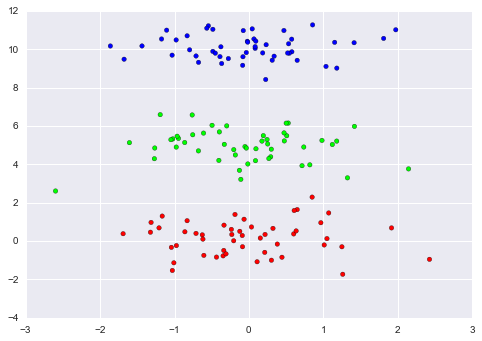

In [3]:
plt.scatter(X[:,0], X[:,1], c=y);

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_grad(z):
    return sigmoid(z)*(1 - sigmoid(z))

In [5]:
ninput = 2
nhidden = 4
noutput = 3
W = np.random.uniform(-1, 1, size=(ninput+1, nhidden)) - 0.5
V = np.random.uniform(-1, 1, size=(nhidden+1, noutput)) - 0.5

In [6]:
def predict(W, V, X):
    """Do forward propagation given first and second layers"""
    n, m = X.shape
    a1 = np.concatenate((np.ones((n,1)), X), axis=1)
    z2 = a1.dot(W)
    a2 = sigmoid(z2)
    a2 = np.concatenate((np.ones((n,1)), a2), axis=1)
    z3 = a2.dot(V)
    a3 = sigmoid(z3)
    h = a3
    return h

In [7]:
def compute_grad_bp(W, V, X, Y):
    """
    Compute gradient of NN parameters for one iteration
    using back propagation
    """
    # initialize few parameters
    n, m = X.shape
    
    dW = np.zeros_like(W)
    dV = np.zeros_like(V)
    
    a1 = np.concatenate((np.ones((n,1)), X), axis=1)
    z2 = a1.dot(W)
    a2 = sigmoid(z2)
    a2 = np.concatenate((np.ones((n,1)), a2), axis=1)
    z3 = a2.dot(V)
    a3 = sigmoid(z3)
    h = a3
    
    # back propagation
    delta3 = h - Y
    delta2 = delta3.dot(V[1::,:].T)*sigmoid_grad(z2)
    
    dW = (1/m)*((delta2.T).dot(a1)).T
    dV = (1/m)*((delta3.T).dot(a2)).T
    
    return dW, dV

In [8]:
# gradient descent to find final neural nets parameter
n_iter = 4000
mu = 0.01
dW = np.zeros_like(W)
dV = np.zeros_like(V)
for i in range(n_iter):
    dW, dV = compute_grad_bp(W, V, X, y)
    W = W - mu*dW
    V = V - mu*dV

In [9]:
y_hat = predict(W, V, X)
print('Predicted output class: \n', y_hat.argmax(axis=1))
print( )

Predicted output class: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



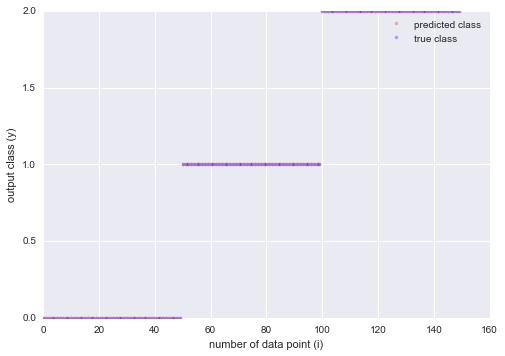

In [10]:
plt.plot(y_hat.argmax(axis=1), '.r', alpha=0.3)
plt.plot(y.argmax(axis=1), '.b', alpha=0.3) # output class for each datapoint
plt.xlabel('number of data point (i)')
plt.ylabel('output class (y)')
plt.legend(['predicted class', 'true class'])
plt.show()

## **Problem 2: Unsupervised learning – k-means clustering**

In each of the next problems you are given data that appears to be produced by two clusters (use the code in ps1 `datasets.m`, 2a).  Your job in this problem is to use k-means clustering to classify the data according to two clusters. Plot the trajectory of the means as they are updated over iterations, with this trajectory superimposed over the data sets.

In [11]:
X1 = np.hstack((np.random.normal(6, 1, size=(100,1)), np.random.normal(2, 1, size=(100, 1))))
X2 = np.hstack((np.random.normal(2, 1, size=(100,1)), np.random.normal(8, 1, size=(100, 1))))
X = np.vstack((X1, X2))

In [12]:
def update(X, centers, alpha=0.05):
    """Update K-mean center and compute cost in that iteration"""
    K = len(centers) # number of cluster
    D = np.vstack([np.linalg.norm(X - center, axis=1) for center in centers]) # compute distance
    clusters = np.argmin(D.T, axis=1) # assign clusters
    
    centers = np.vstack([X[clusters==k].mean(axis=0) for k in range(K)])
    
    # compute cost
    J = np.sum([np.sum(np.linalg.norm(X[clusters==k] - centers[k], axis=1)) for k in range(K)])
    return centers, J, clusters

In [13]:
def random_centers(X, K=2):
    """
    Randomly generate K centers from data X
    """
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    centers = []
    for k in range(K):
        center = [np.random.uniform(X_min[i], X_max[i]) for i in range(len(X_min))]
        centers.append(center)
    return np.array(centers)

In [14]:
n_iter = 100
n_cluster = 2
centers = random_centers(X, K=n_cluster) # random center
clusters = np.zeros(X.shape[0])
u = True
J_list = []
centers_list = []
while u:
    clusters_prev = clusters
    centers, J, clusters = update(X, centers) # compute new center and cost
    J_list.append(J)
    centers_list.append(centers)
    if np.all(clusters_prev == clusters):
        u = False

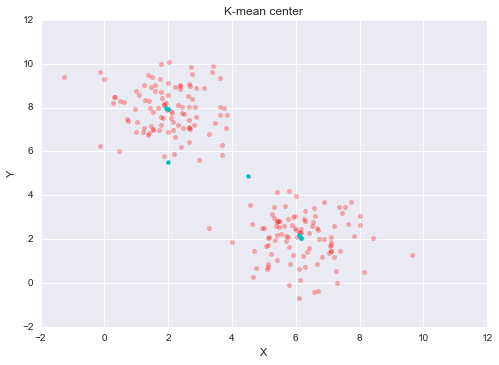

Center for final cluster are  [6.1613762700714982, 2.0620342547036632]  and  [1.9846341574039352, 7.9413946106762605]


In [15]:
plt.scatter(X[:, 0], X[:, 1], color='r', alpha=0.3)
for c in centers_list:
    for k in range(n_cluster):
        plt.scatter(c[k][0], c[k][1], color='c', lw = 0)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-mean center')
plt.show()
print('Center for final cluster are ', list(centers_list[-1][0]), ' and ',  list(centers_list[-1][1]))

## **Problem 3: Unsupervised learning – ML gradient descent**

Your job is to classify the same dataset as used in problem 2 into two clusters using ML gradient descent to update the values of mean and standard deviation of two Gaussian clusters.  Assume that the prior probabilities of each cluster are already given and fixed at 0.5 each.  

Negative log likelihood is as following $l(\mathbf{\mu}_k, \sigma_k^2) = - \sum_{i=1}^{N} \log(\sum_{k=1}^K \pi_k N(\mathbf{x}_i | \mathbf{\mu}_k , \sigma_k^2 I))$

[ 10.22509085   2.02324197] [ 2.03335633  7.87270532]


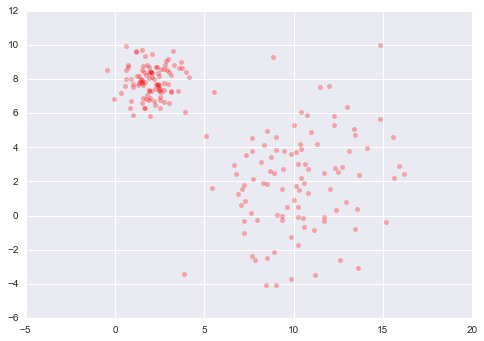

In [16]:
X1 = np.hstack((np.random.normal(10, 3, size=(100,1)), np.random.normal(2, 3, size=(100, 1))))
X2 = np.hstack((np.random.normal(2, 1, size=(100,1)), np.random.normal(8, 1, size=(100, 1))))
X = np.vstack((X1, X2))
print(np.mean(X1, axis=0), np.mean(X2, axis=0))
plt.scatter(X[:, 0], X[:, 1], color='r', alpha=0.3)
plt.show()

In [17]:
import numpy.linalg as la
def inv(A):
    return la.inv(A)

In [18]:
# not sure version ...
mu = 0.05
mu_sigma = 0.001
n_iter = 50
centers = random_centers(X, K=2)
print(centers)
sigma = np.array([np.random.rand(1)*np.eye(2), np.random.rand(1)*np.eye(2)])
p = np.array([0.5, 0.5])
for n in range(n_iter):
    sigma_grad = np.zeros_like(sigma)
    # calculate cluster
    D = np.vstack([np.linalg.norm(X - center, axis=1) for center in centers]) # distance
    clusters = np.argmin(D.T, axis=1)
    # update new centers
    for i in range(len(X)):
        for j in range(len(centers)):
            centers[clusters[i]] = centers[clusters[i]] + mu*(inv(sigma[clusters[i]]).dot(X[i] - centers[clusters[i]]))
            D = np.vstack([np.linalg.norm(X - center, axis=1) for center in centers])
            clusters = np.argmin(D.T, axis=1)
            t = np.atleast_2d(X[i] - centers[clusters[i]]).T
            cov = t.dot(t.T)
            sigma_grad[clusters[i]] = 0.5*(-inv(sigma[clusters[i]]) + inv(sigma[clusters[i]]).dot(cov).dot(inv(sigma[clusters[i]])))
            sigma[clusters[i]] = sigma[clusters[i]] + mu_sigma*sigma_grad[clusters[i]]
print('center: ', centers)
print('sigma: ', sigma)

[[ 7.42731639 -1.34320236]
 [ 3.23160984  0.29124671]]
center:  [[ 10.28780621   2.0369936 ]
 [  1.97830081   7.49902711]]
sigma:  [[[ 3.5433153   0.5139103 ]
  [ 0.5139103   3.97407983]]

 [[ 1.28096323  0.0549102 ]
  [ 0.0549102   0.81869803]]]


consider special case when $\Sigma = \sigma_i I$

In [19]:
mu = 0.01
mu_sigma = 0.01
n_iter = 100
centers = random_centers(X, K=2)
print('Initialized center = \n', centers)
sigma = np.random.rand(2)
print('Initializerd standard deviation = \n', sigma)

for n in range(n_iter):
    D = np.vstack([np.linalg.norm(X - center, axis=1) for center in centers])
    clusters = np.argmin(D.T, axis=1)
    for i in range(len(X)):
        # move center
        centers[clusters[i]] = centers[clusters[i]] + mu*((X[i] - centers[clusters[i]])/(sigma[clusters[i]])**2)
        D = np.vstack([np.linalg.norm(X - center, axis=1) for center in centers])
        clusters = np.argmin(D.T, axis=1)
        cov = (X[i] - centers[clusters[i]]).dot((X[i] - centers[clusters[i]]))
        sigma[clusters[i]] = sigma[clusters[i]] + mu_sigma*(-1/sigma[clusters[i]] + cov*(1/sigma[clusters[i]]**3))
print('Final center = \n', centers)
print('Final standard deviation = \n', sigma)

Initialized center = 
 [[  2.25353607  -1.49213133]
 [ 12.80157862   6.18503964]]
Initializerd standard deviation = 
 [ 0.3743393   0.69633604]
Final center = 
 [[  2.12964733   7.84956295]
 [ 10.34997655   1.8867271 ]]
Final standard deviation = 
 [ 1.47247883  3.72380159]
